# Plot Comparison Between Algorithms

In [52]:
import os
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
basepath = '../data/'
algorithms = os.listdir(basepath)
algorithms_to_plot = ['esarsa', 'example']

We need to read the CSV files (from a function in another file) to get the reward at each timestep for each run of each algorithm.

In [58]:
data = {}
from load import load_data
for alg in algorithms:
    if alg in algorithms_to_plot:
        continue
    data[str(alg)] = load_data(basepath+alg)

print('Data will be plotted for', ','.join([k for k in data.keys()]))

NotADirectoryError: [Errno 20] Not a directory: '../data/.DS_Store'

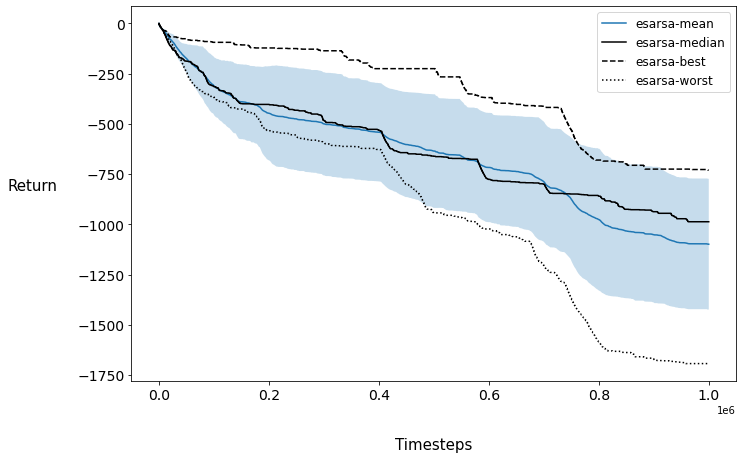

In [55]:
'''
Define figure and axes
'''
figure, axes = plt.subplots(figsize=(12,8));
    
# -----Split here-----


'''
Calculates the mean and median performance across multiple runs
Calculates the 95% confidence interval
Plots the mean and median performance with the 95% confidence interval in a shaded region
'''
for alg, returns_list_files in data.items():
    numruns = returns_list_files.shape[0]
    
    mean_returns_list = np.mean(returns_list_files, axis=0)
    stddev_returns_list = np.std(returns_list_files, axis=0)
    
    CI95_returns_list = 1.96 * stddev_returns_list / np.sqrt(numruns)
    min_CI95_returns_list = mean_returns_list - CI95_returns_list
    max_CI95_returns_list = mean_returns_list + CI95_returns_list
    
    lenrun = len(mean_returns_list)
    xaxis = np.array([i for i in range(1,lenrun+1)])
    
    axes.plot(xaxis, mean_returns_list, label=str(alg)+'-mean')
    axes.fill_between(xaxis, min_CI95_returns_list, max_CI95_returns_list, alpha=0.25)

    '''
    # Calculates median across every timestep, does not report the median run

    sorted_returns_list = np.sort(returns_list_files, axis=0)
    if numruns % 2 == 1:
        median_returns_list = sorted_returns_list[int((numruns-1)/2)]
    else:
        median_returns_list = (sorted_returns_list[int(numruns/2)] + sorted_returns_list[int(numruns/2 - 1)]) / 2.0
    axes.plot(xaxis, median_returns_list, label=str(alg)+'-median', color='black') 
    '''

    
    # Calculates the median run based on final performance
    indices = np.argsort(returns_list_files[:,-1])
    if numruns % 2 == 1:
        median_returns_list = returns_list_files[indices[int((numruns-1)/2)]]
    else:
        median_returns_list = (returns_list_files[indices[int(numruns/2)]] + returns_list_files[indices[int(numruns/2 - 1)]])/2.0
    axes.plot(xaxis, median_returns_list, label=str(alg)+'-median', color='black') 
    
    best_returns_list = returns_list_files[indices[-1]]
    worst_returns_list = returns_list_files[indices[0]]
    axes.plot(xaxis, best_returns_list, label=str(alg)+'-best', color='black', linestyle ='--')
    axes.plot(xaxis, worst_returns_list, label=str(alg)+'-worst', color='black', linestyle = ':')


    
# -----Split here-----


'''
Configuration settings of the plot
'''
axes.set_xlabel('Timesteps', size=15, labelpad=35)
axes.set_ylabel('Return', size=15, rotation=0, labelpad=45)
axes.legend(loc=0, fontsize=12)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tight_layout()
plt.subplots_adjust(left=0.2, right = 0.9, bottom=0.2, top= 0.85, wspace=0.45, hspace = 0.5)


# -----Split here-----


'''
Save and display the plot
'''
plt.savefig('esarsa-mean-median-best-worst.png',dpi=500)
plt.show()